In [10]:
import pandas as pd

# Loading the dataset
data = pd.read_csv("C:\\Users\\lefen\\Downloads\\spam.csv", encoding='latin-1')
# Dropping unnecessary columns if they exist and rename the required columns for clarity
data = data[['Category', 'Message']]
data.columns = ['label', 'message']
# Displaying the first few rows of the dataset
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Displaying the distribution of the 'Category' column
category_distribution = data['label'].value_counts()
category_distribution

ham     4825
spam     747
Name: label, dtype: int64

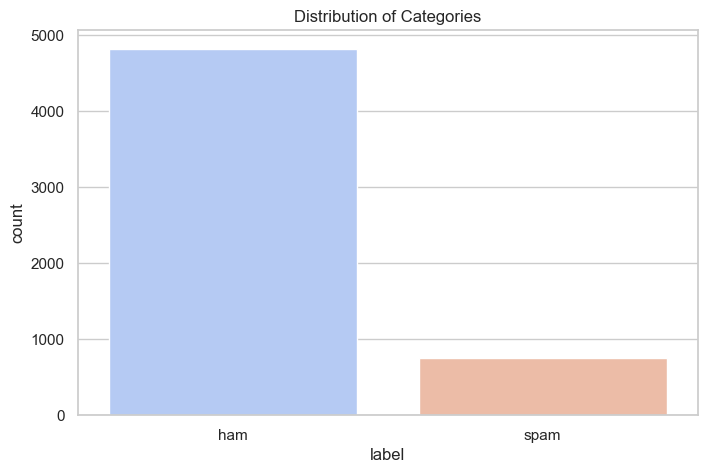

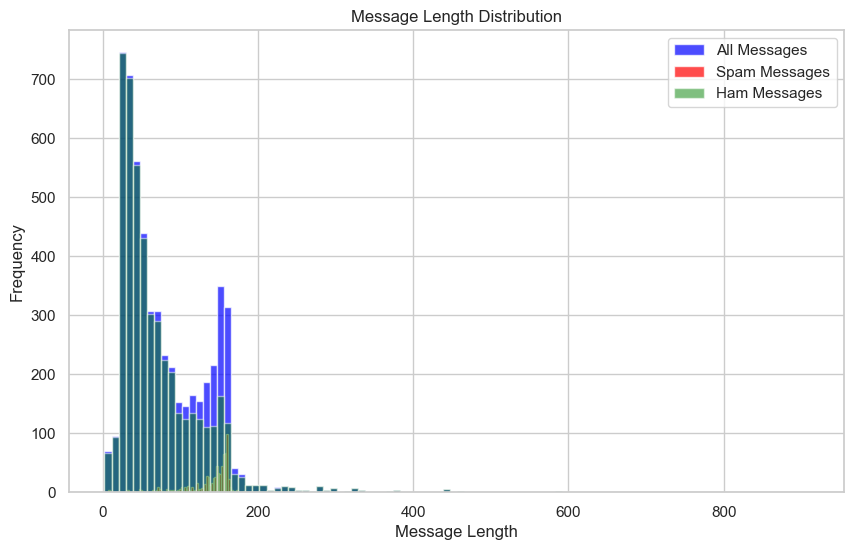

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot of 'Category' value counts
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='label', palette='coolwarm')
plt.title('Distribution of Categories')
plt.show()

# Add a new column for the length of the message
data['length'] = data['message'].apply(len)

# Create a histogram for the length of messages
plt.figure(figsize=(10, 6))
data['length'].hist(bins=100, color='blue', alpha=0.7, label='All Messages')
data[data['label'] == 'spam']['length'].hist(bins=100, color='red', alpha=0.7, label='Spam Messages')
data[data['label'] == 'ham']['length'].hist(bins=100, color='green', alpha=0.5, label='Ham Messages')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.title('Message Length Distribution')
plt.legend()
plt.show()


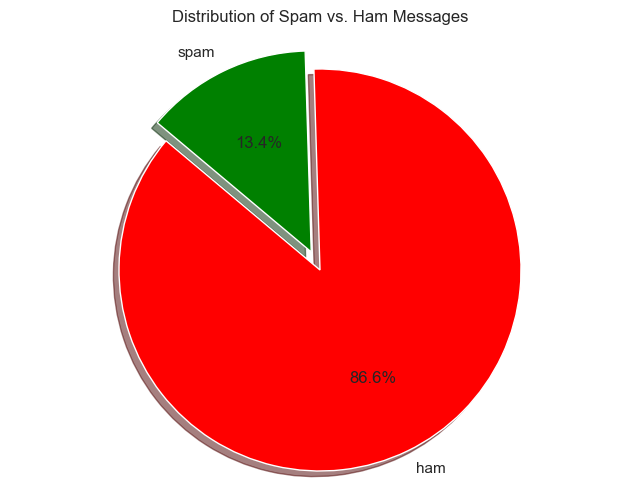

In [17]:
# 1. Category Distribution using a Pie Chart

labels = category_distribution.index
sizes = category_distribution.values
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Spam vs. Ham Messages")
plt.show()


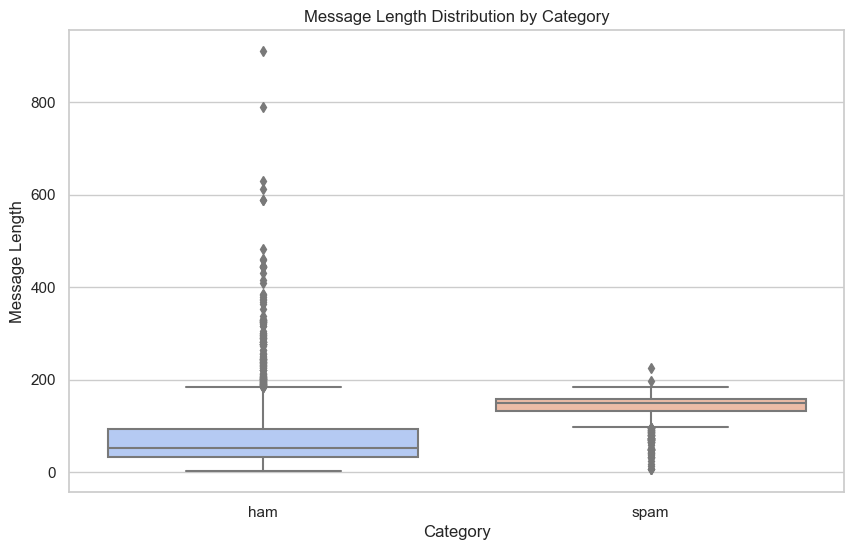

In [19]:
# 2. Message Length Analysis using Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length', data=data, palette='coolwarm')
plt.title('Message Length Distribution by Category')
plt.ylabel('Message Length')
plt.xlabel('Category')
plt.show()


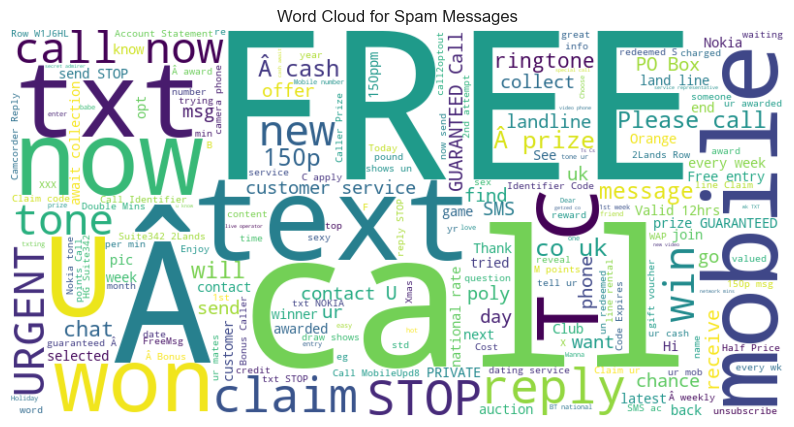

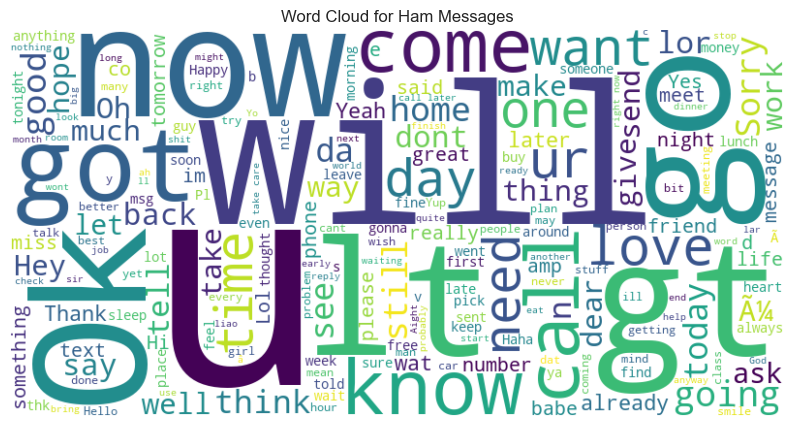

In [20]:
from wordcloud import WordCloud

# Function to generate a word cloud for a given text
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for spam and ham messages
spam_text = ' '.join(data[data['label'] == 'spam']['message'])
ham_text = ' '.join(data[data['label'] == 'ham']['message'])

generate_wordcloud(spam_text, "Word Cloud for Spam Messages")
generate_wordcloud(ham_text, "Word Cloud for Ham Messages")


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into features and target label
X = data['message']
y = data['label'].map({'ham': 0, 'spam': 1})  # Convert ham to 0 and spam to 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize a TF-IDF vectorizer and transform the messages
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape


((4457, 7429), (1115, 7429))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initializing the classifiers
logistic_reg = LogisticRegression(random_state=42)
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(random_state=42)

# Listing of classifiers and their names
classifiers = [(logistic_reg, "Logistic Regression"), 
               (naive_bayes, "Multinomial Naive Bayes"), 
               (random_forest, "Random Forest")]

# Dictionary to store accuracy scores
accuracy_scores = {}

# Training the classifiers and store their accuracy scores
for classifier, name in classifiers:
    classifier.fit(X_train_transformed, y_train)
    predictions = classifier.predict(X_test_transformed)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores[name] = accuracy

accuracy_scores


{'Logistic Regression': 0.9668161434977578,
 'Multinomial Naive Bayes': 0.9695067264573991,
 'Random Forest': 0.9721973094170404}

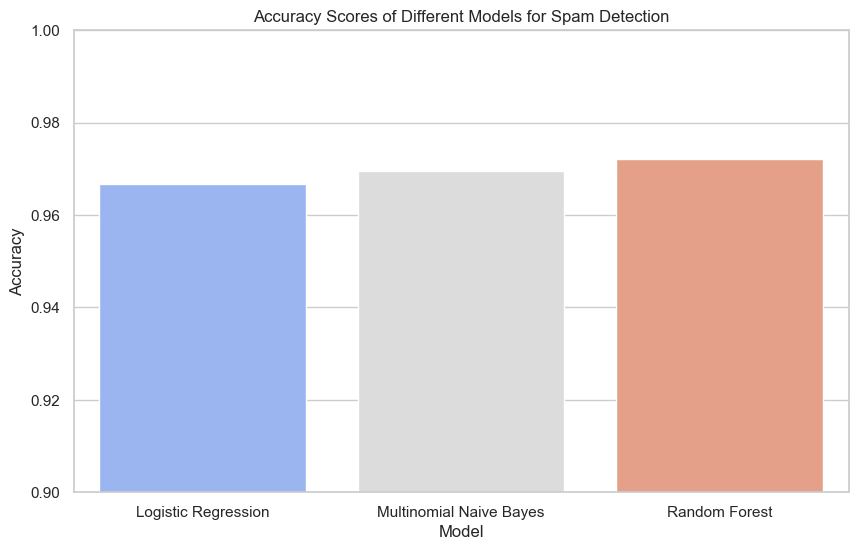

In [24]:
# Plotting a bar chart for the accuracy scores of the models
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='coolwarm')
plt.ylim(0.9, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracy Scores of Different Models for Spam Detection')
plt.show()
